In [1]:
DATASET="rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.root"

In [2]:
import time
import os
import numpy as np
from mu2etools import *
from mu2etools import wideband

In [3]:
processor = wideband.DataProcessor(usexroot=True,
                                   fixtimes=False,
                                   treename='run', 
                                   filter_name=['PEs', 'timeSinceSpill', 'spillNumber', 'eventNumber','trackIntercept', 'trackChi2', 'trackPoints', 'trackPEs'],
                                   runlist=[1720,1721,1722,1723], userunlist=True, remove=False
                                  )
ar = processor.getData(DATASET)
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [4]:
ar

<Array [{spillNumber: 1, ...}, ..., {...}] type='643595 * {spillNumber: int...'>

In [98]:
# use this method to open files if wideband.DataProcessor doesn't work
rootfile = uproot.open("root://fndca1.fnal.gov:1094/pnfs/fnal.gov/usr/mu2e/scratch/users/ehrlich/sidet/crvrecoTest/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000.001720_000.root")
hep.style.use('ATLAS')

PEs = rootfile["run"]["PEs"].arrays()
trackIntercept = rootfile["run"]["trackIntercept"].arrays()
trackChi2 = rootfile["run"]["trackChi2"].arrays()
trackPoints = rootfile["run"]["trackPoints"].arrays()
trackPEs = rootfile["run"]["trackPEs"].arrays()
eventNumber = rootfile["run"]["eventNumber"].arrays()
spillNumber = rootfile["run"]["spillNumber"].arrays()

In [ ]:
for feb in range(3,5):
    plt.hist(ar['PEs'][:,feb,16], histtype='step', bins=60, range=[5, 125], label='PEs[%d][16]'%feb);
    plt.hist(ar['PEs'][:,feb,48], histtype='step', bins=60, range=[5, 125], label='PEs[%d][48]'%feb);
plt.legend()
plt.xlabel('PEs')

In [5]:
ineff_triangle = []

FEB0_0 = (ak.sum(ar["PEs"][:,0,10:22], axis=-1)>10)
FEB0_1 = (ak.sum(ar["PEs"][:,0,42:54], axis=-1)>10)

FEB1_0 = (ak.sum(ar["PEs"][:,1,10:22], axis=-1)>10)
FEB1_1 = (ak.sum(ar["PEs"][:,1,42:56], axis=-1)>10)

FEB2_0 = (ak.sum(ar["PEs"][:,2,10:22], axis=-1)>10)
FEB2_1 = (ak.sum(ar["PEs"][:,2,42:54], axis=-1)>10)

FEB3_0 = (ak.sum(ar["PEs"][:,3,10:22], axis=-1)>10)
FEB3_1 = (ak.sum(ar["PEs"][:,3,42:54], axis=-1)>10)

FEB4_0 = (ak.sum(ar["PEs"][:,4,10:22], axis=-1)>10)
FEB4_1 = (ak.sum(ar["PEs"][:,4,42:54], axis=-1)>10)

FEB5_0 = (ak.sum(ar["PEs"][:,5,10:22], axis=-1)>10)
FEB5_1 = (ak.sum(ar["PEs"][:,5,42:54], axis=-1)>10)

FEB6_0 = (ak.sum(ar["PEs"][:,6,10:22], axis=-1)>10)
FEB6_1 = (ak.sum(ar["PEs"][:,6,42:54], axis=-1)>10)

FEB7_0 = (ak.sum(ar["PEs"][:,7,10:22], axis=-1)>10)
FEB7_1 = (ak.sum(ar["PEs"][:,7,42:54], axis=-1)>10)


nHits = ak.values_astype(FEB0_0, "int") + ak.values_astype(FEB0_1, "int") + \
        ak.values_astype(FEB1_0, "int") + ak.values_astype(FEB1_1, "int") + \
        ak.values_astype(FEB2_0, "int") + ak.values_astype(FEB2_1, "int") + \
        ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
        ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int") + \
        ak.values_astype(FEB5_0, "int") + ak.values_astype(FEB5_1, "int") + \
        ak.values_astype(FEB6_0, "int") + ak.values_astype(FEB6_1, "int") + \
        ak.values_astype(FEB7_0, "int") + ak.values_astype(FEB7_1, "int")

ar_clean = ar[(nHits >= 16) & (ar["trackIntercept"] < -360) & (ar["trackIntercept"] > -415) & (ar["trackChi2"] < 5000) & (ar["trackPoints"] < 25) & (ar["trackPEs"] < 2500)]

for thresh in range(10,140,10):
    
    triangle = (ak.sum(ar_clean["PEs"][:,0,0:8], axis=-1)>thresh)
    
    nPass = ak.count(ar_clean[triangle]["eventNumber"])    
    nTrig = ak.count(ar_clean["eventNumber"])
    
    ineff_triangle.append(1 - nPass/nTrig)
            
    print(thresh, nPass, nTrig)


10 8089 8089
20 8089 8089
30 8089 8089
40 8088 8089
50 8080 8089
60 7973 8089
70 7429 8089
80 6085 8089
90 4132 8089
100 2542 8089
110 1537 8089
120 964 8089
130 687 8089


In [6]:
ineff_rect = []

FEB0_1 = (ak.sum(ar["PEs"][:,0,42:54], axis=-1)>10)

FEB1_0 = (ak.sum(ar["PEs"][:,1,10:22], axis=-1)>10)
FEB1_1 = (ak.sum(ar["PEs"][:,1,42:54], axis=-1)>10)

FEB2_0 = (ak.sum(ar["PEs"][:,2,10:22], axis=-1)>10)
FEB2_1 = (ak.sum(ar["PEs"][:,2,42:54], axis=-1)>10)

FEB3_0 = (ak.sum(ar["PEs"][:,3,10:22], axis=-1)>10)
FEB3_1 = (ak.sum(ar["PEs"][:,3,42:54], axis=-1)>10)

FEB4_0 = (ak.sum(ar["PEs"][:,4,10:22], axis=-1)>10)
FEB4_1 = (ak.sum(ar["PEs"][:,4,42:54], axis=-1)>10)

FEB5_0 = (ak.sum(ar["PEs"][:,5,10:22], axis=-1)>10)
FEB5_1 = (ak.sum(ar["PEs"][:,5,42:54], axis=-1)>10)

FEB6_0 = (ak.sum(ar["PEs"][:,6,10:22], axis=-1)>10)
FEB6_1 = (ak.sum(ar["PEs"][:,6,42:54], axis=-1)>10)

FEB7_0 = (ak.sum(ar["PEs"][:,7,10:22], axis=-1)>10)
FEB7_1 = (ak.sum(ar["PEs"][:,7,42:54], axis=-1)>10)


nHits = ak.values_astype(FEB0_1, "int") + \
        ak.values_astype(FEB1_0, "int") + ak.values_astype(FEB1_1, "int") + \
        ak.values_astype(FEB2_0, "int") + ak.values_astype(FEB2_1, "int") + \
        ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
        ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int") + \
        ak.values_astype(FEB5_0, "int") + ak.values_astype(FEB5_1, "int") + \
        ak.values_astype(FEB6_0, "int") + ak.values_astype(FEB6_1, "int") + \
        ak.values_astype(FEB7_0, "int") + ak.values_astype(FEB7_1, "int")

ar_clean = ar[(nHits >= 15) & (ar["trackIntercept"] < -290) & (ar["trackIntercept"] > -520) & (ar["trackChi2"] < 5000) & (ar["trackPoints"] < 25) & (ar["trackPEs"] < 2500)]

for thresh in range(10,140,10):

    rect = (ak.sum(ar_clean["PEs"][:,0,8:28], axis=-1)>thresh)

    nPass = ak.count(ar_clean[rect]["eventNumber"])    
    nTrig = ak.count(ar_clean["eventNumber"])
    
    ineff_rect.append(1 - nPass/nTrig)
            
    print(thresh, nPass, nTrig)


10 26183 26274
20 26161 26274
30 26129 26274
40 26074 26274
50 25993 26274
60 25863 26274
70 25596 26274
80 24827 26274
90 22351 26274
100 17890 26274
110 12779 26274
120 8632 26274
130 5895 26274


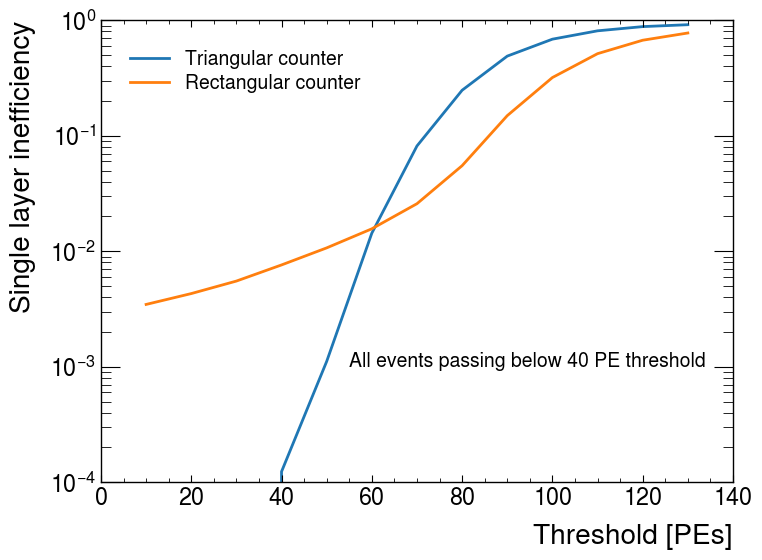

In [10]:
fig, ax = plt.subplots()

ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_triangle, label='Triangular counter')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_rect, label='Rectangular counter')

ax.legend()

ax.set_yscale('log')

ax.set_ylim(0.0001, 1)

ax.set_xlabel('Threshold [PEs]')
ax.set_ylabel('Single layer inefficiency')

ax.text(55, 0.001, 'All events passing below 40 PE threshold')

plt.legend()

plt.show()

In [13]:
ar_clean = ar[(nHits >= 15) & (ar["trackIntercept"] < -360) & (ar["trackIntercept"] > -415) & (ar["trackChi2"] < 5000) & (ar["trackPoints"] < 25) & (ar["trackPEs"] < 2500)]

rect = (ak.sum(ar_clean["PEs"][:,0,8:28], axis=-1)>10)

rect_fail = (ak.sum(ar_clean["PEs"][:,0,8:28], axis=-1)<10)

nPass = ak.count(ar_clean[rect]["eventNumber"])
nTrig = ak.count(ar_clean["eventNumber"])

for i in range(len(ar_clean[rect_fail]["eventNumber"])):
    print("Spill number: ", ar_clean[rect_fail]["spillNumber"][i], "Event number: ", ar_clean[rect_fail]["eventNumber"][i], "Track Points: ", ar_clean[rect_fail]["trackPoints"][i])
    if i > 30:
        break

Spill number:  61 Event number:  115 Track Points:  15
Spill number:  128 Event number:  114 Track Points:  17
Spill number:  154 Event number:  177 Track Points:  15
Spill number:  233 Event number:  297 Track Points:  15
Spill number:  374 Event number:  218 Track Points:  15
Spill number:  491 Event number:  72 Track Points:  16
Spill number:  542 Event number:  338 Track Points:  17
Spill number:  26 Event number:  244 Track Points:  15
Spill number:  144 Event number:  377 Track Points:  15
Spill number:  152 Event number:  110 Track Points:  15
Spill number:  220 Event number:  309 Track Points:  16
Spill number:  323 Event number:  343 Track Points:  15
Spill number:  365 Event number:  236 Track Points:  15
Spill number:  375 Event number:  250 Track Points:  15
Spill number:  399 Event number:  229 Track Points:  15
Spill number:  598 Event number:  308 Track Points:  15
Spill number:  607 Event number:  119 Track Points:  15
Spill number:  611 Event number:  348 Track Points:

In [11]:
# stuff below this has not been updated

In [6]:
#Mask layers in the trigger modules above the 10 PE threshold
FEB0_0 = (ak.sum(ar['PEs'][:,0,0:32], axis=-1)>10)
FEB0_1 = (ak.sum(ar['PEs'][:,0,32:64], axis=-1)>10)

FEB1_0 = (ak.sum(ar['PEs'][:,1,0:32], axis=-1)>10)
FEB1_1 = (ak.sum(ar['PEs'][:,1,32:64], axis=-1)>10)

FEB2_0 = (ak.sum(ar['PEs'][:,2,0:32], axis=-1)>10)
FEB2_1 = (ak.sum(ar['PEs'][:,2,32:64], axis=-1)>10)

FEB5_0 = (ak.sum(ar['PEs'][:,5,0:32], axis=-1)>10)
FEB5_1 = (ak.sum(ar['PEs'][:,5,32:64], axis=-1)>10)

arr_clean = ar[FEB0_0 & FEB0_1 & FEB1_0 & FEB1_1 & FEB2_0 & FEB2_1 & FEB5_0 & FEB5_1]

In [7]:
#Mask layers in the test module above the 10 PE threshold
FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>10)
FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>10)

FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>10)
FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>10)

In [8]:
nHits = ak.values_astype(FEB3_0, "int")+ \
       ak.values_astype(FEB3_1, "int")+ \
       ak.values_astype(FEB4_0, "int")+ \
       ak.values_astype(FEB4_1, "int")

In [9]:
nPass = ak.count(arr_clean[(nHits==4) | (nHits==3)]['eventNumber'])
nTrig = ak.count(arr_clean['eventNumber'])
print('3-4 efficiency: %.2f'%(nPass/nTrig*100))

3-4 efficiency: 99.96


In [10]:
nPass = ak.count(arr_clean[(nHits==4)]['eventNumber'])
nTrig = ak.count(arr_clean['eventNumber'])
print('4-4 efficiency: %.2f'%(nPass/nTrig*100))

4-4 efficiency: 98.52


Text(1, 0, 'nHits')

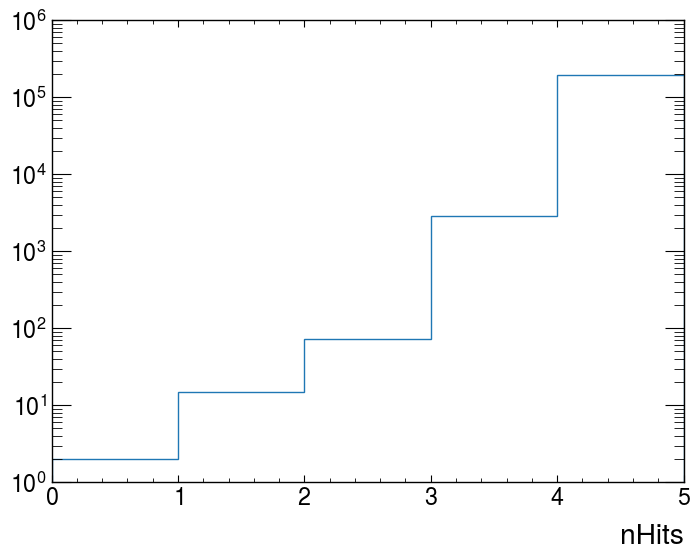

In [11]:
plt.hist(nHits, histtype='step', bins=5, range=(0,5));
plt.yscale('log')
plt.xlabel('nHits')

In [12]:
#Failed events with only one hit in CRV
arr_clean[(nHits==1)]

<Array [{spillNumber: 58, ...}, ..., {...}] type='15 * {spillNumber: int32,...'>

In [233]:
ineff_5 = []
ineff_6 = []
ineff_7 = []
ineff_8 = []

ineff_5_0 = []
ineff_6_0 = []
ineff_7_0 = []
ineff_8_0 = []

ineff_5_1 = []
ineff_6_1 = []
ineff_7_1 = []
ineff_8_1 = []

ineff_5_2 = []
ineff_6_2 = []
ineff_7_2 = []
ineff_8_2 = []

ineff_5_3 = []
ineff_6_3 = []
ineff_7_3 = []
ineff_8_3 = []

coincidence_5 = []
coincidence_6 = []
coincidence_7 = []
coincidence_8 = []

FEB0_0 = (ak.sum(ar['PEs'][:,0,4:28], axis=-1)>10)
FEB0_1 = (ak.sum(ar['PEs'][:,0,36:60], axis=-1)>10)

FEB1_0 = (ak.sum(ar['PEs'][:,1,4:28], axis=-1)>10)
FEB1_1 = (ak.sum(ar['PEs'][:,1,36:60], axis=-1)>10)

FEB2_0 = (ak.sum(ar['PEs'][:,2,4:28], axis=-1)>10)
FEB2_1 = (ak.sum(ar['PEs'][:,2,34:60], axis=-1)>10)

FEB5_0 = (ak.sum(ar['PEs'][:,5,4:28], axis=-1)>10)
FEB5_1 = (ak.sum(ar['PEs'][:,5,36:60], axis=-1)>10)

nHits = ak.values_astype(FEB0_0, "int") + ak.values_astype(FEB0_1, "int") + \
        ak.values_astype(FEB1_0, "int") + ak.values_astype(FEB1_1, "int") + \
        ak.values_astype(FEB2_0, "int") + ak.values_astype(FEB2_1, "int") + \
        ak.values_astype(FEB5_0, "int") + ak.values_astype(FEB5_1, "int")

for thresh in range(10,140,10):
    
    for hits in range(5,9):
    
        arr_clean = ar[FEB0_0 & FEB5_1 & (nHits >= hits)]
    
        FEB3_0 = (ak.sum(arr_clean['PEs'][:,0,0:4], axis=-1)>thresh)
        FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>thresh)

        FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>thresh)
        FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>thresh)
    
        nHits_test = ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
                     ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int")
        
        
        nPass = ak.count(arr_clean[(nHits_test>=1)]['eventNumber'])
        nPass_0 = ak.count(arr_clean[FEB3_0]['eventNumber'])
        nPass_1 = ak.count(arr_clean[FEB3_1]['eventNumber'])
        nPass_2 = ak.count(arr_clean[FEB4_0]['eventNumber'])
        nPass_3 = ak.count(arr_clean[FEB4_1]['eventNumber'])
        
        nTrig = ak.count(arr_clean['eventNumber'])
        
        if hits == 5:
            ineff_5.append(1 - nPass/nTrig)
            ineff_5_0.append(1 - nPass_0/nTrig)
            ineff_5_1.append(1 - nPass_1/nTrig)
            ineff_5_2.append(1 - nPass_2/nTrig)
            ineff_5_3.append(1 - nPass_3/nTrig)
            
            if thresh == 10:
                coincidence_5.append(nHits_test)
                
        if hits == 6:
            ineff_6.append(1 - nPass/nTrig)
            ineff_6_0.append(1 - nPass_0/nTrig)
            ineff_6_1.append(1 - nPass_1/nTrig)
            ineff_6_2.append(1 - nPass_2/nTrig)
            ineff_6_3.append(1 - nPass_3/nTrig)
            
            if thresh == 10:
                coincidence_6.append(nHits_test)
                
        if hits == 7:
            ineff_7.append(1 - nPass/nTrig)
            ineff_7_0.append(1 - nPass_0/nTrig)
            ineff_7_1.append(1 - nPass_1/nTrig)
            ineff_7_2.append(1 - nPass_2/nTrig)
            ineff_7_3.append(1 - nPass_3/nTrig)
            
            if thresh == 10:
                coincidence_7.append(nHits_test)
        
        if hits == 8:
            ineff_8.append(1 - nPass/nTrig)
            ineff_8_0.append(1 - nPass_0/nTrig)
            ineff_8_1.append(1 - nPass_1/nTrig)
            ineff_8_2.append(1 - nPass_2/nTrig)
            ineff_8_3.append(1 - nPass_3/nTrig)
            
            if thresh == 10:
                coincidence_8.append(nHits_test)
            
        print(thresh, hits, nPass_0, nTrig)


10 5 136856 137140
10 6 136006 136234
10 7 134272 134458
10 8 127423 127570
20 5 136746 137140
20 6 135908 136234
20 7 134188 134458
20 8 127351 127570
30 5 136666 137140
30 6 135831 136234
30 7 134118 134458
30 8 127286 127570
40 5 136493 137140
40 6 135658 136234
40 7 133946 134458
40 8 127121 127570
50 5 136124 137140
50 6 135289 136234
50 7 133587 134458
50 8 126776 127570
60 5 135396 137140
60 6 134565 136234
60 7 132878 134458
60 8 126084 127570
70 5 134320 137140
70 6 133495 136234
70 7 131834 134458
70 8 125064 127570
80 5 131837 137140
80 6 131033 136234
80 7 129417 134458
80 8 122720 127570
90 5 125040 137140
90 6 124288 136234
90 7 122739 134458
90 8 116233 127570
100 5 111024 137140
100 6 110370 136234
100 7 108968 134458
100 8 102936 127570
110 5 90969 137140
110 6 90443 136234
110 7 89238 134458
110 8 83951 127570
120 5 70383 137140
120 6 69940 136234
120 7 68957 134458
120 8 64644 127570
130 5 54117 137140
130 6 53743 136234
130 7 52922 134458
130 8 49476 127570


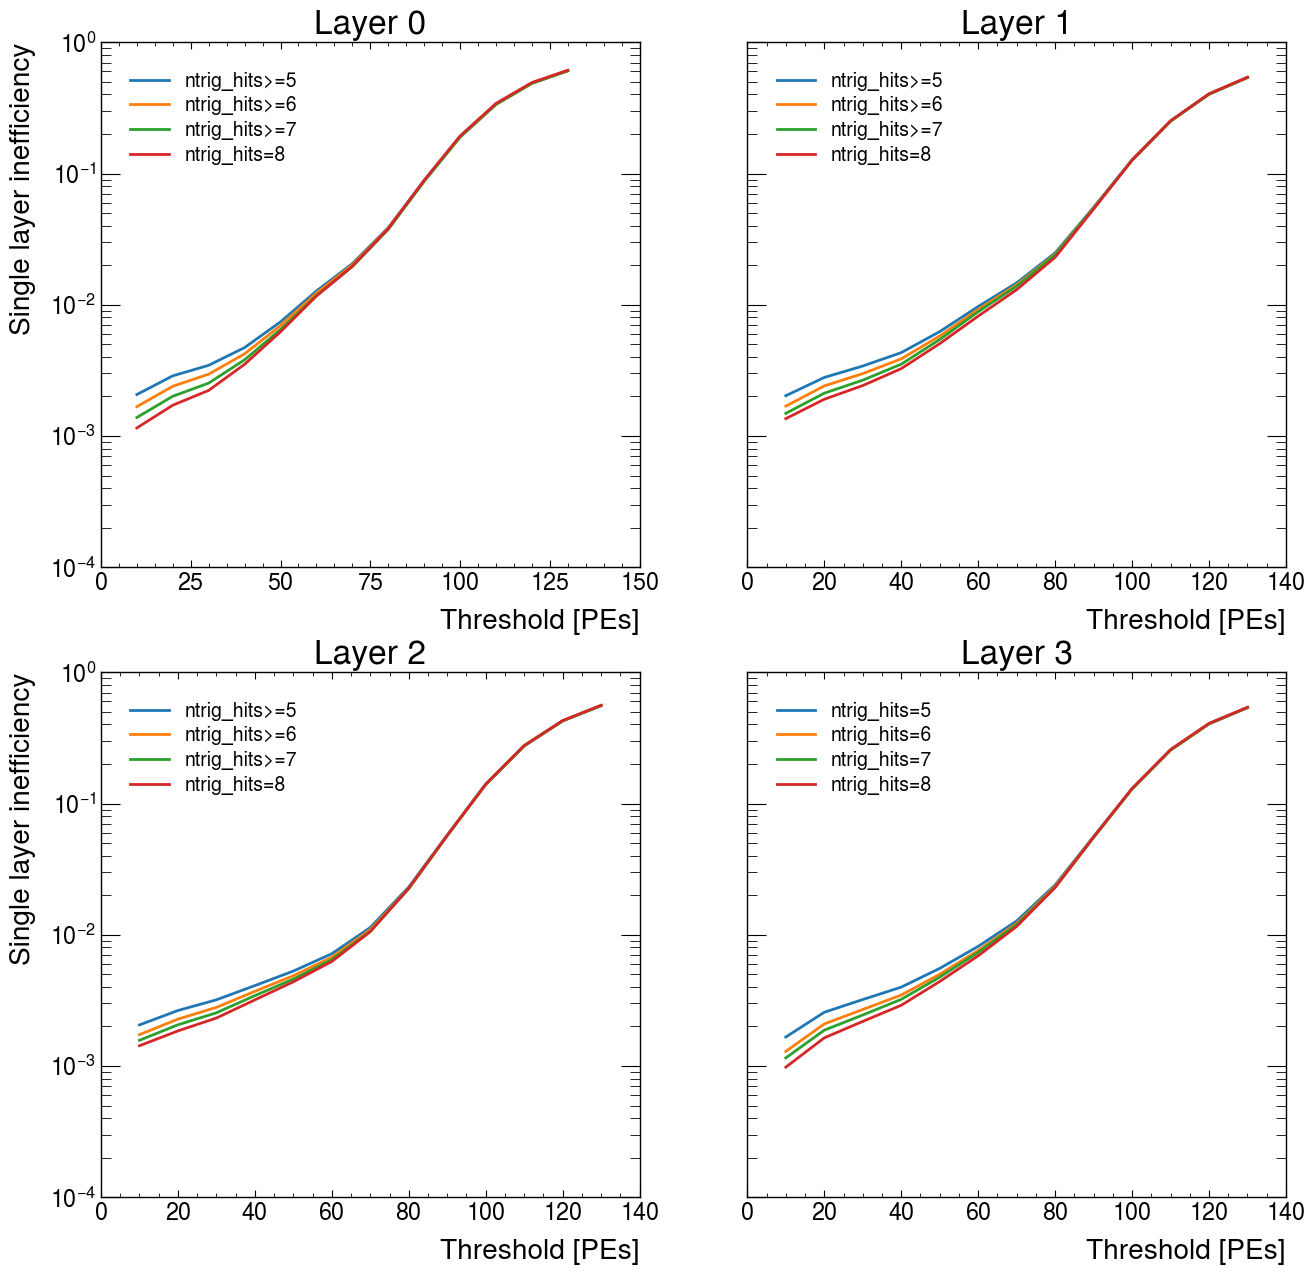

In [234]:
fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2,sharey=True)

ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_0, label='ntrig_hits>=5')
ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_0, label='ntrig_hits>=6')
ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_0, label='ntrig_hits>=7')
ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_0, label='ntrig_hits=8')
ax0.legend()
ax0.set_yscale('log')
ax0.set_xlabel('Threshold [PEs]')
ax0.set_ylabel('Single layer inefficiency')
ax0.set_title('Layer 0')

ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_1, label='ntrig_hits>=5')
ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_1, label='ntrig_hits>=6')
ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_1, label='ntrig_hits>=7')
ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_1, label='ntrig_hits=8')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel('Threshold [PEs]')
ax1.set_title('Layer 1')

ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_2, label='ntrig_hits>=5')
ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_2, label='ntrig_hits>=6')
ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_2, label='ntrig_hits>=7')
ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_2, label='ntrig_hits=8')
ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Threshold [PEs]')
ax2.set_ylabel('Single layer inefficiency')
ax2.set_title('Layer 2')

ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_3, label='ntrig_hits=5')
ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_3, label='ntrig_hits=6')
ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_3, label='ntrig_hits=7')
ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_3, label='ntrig_hits=8')
ax3.legend()
ax3.set_yscale('log')
ax3.set_xlabel('Threshold [PEs]')
ax3.set_title('Layer 3')

fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()

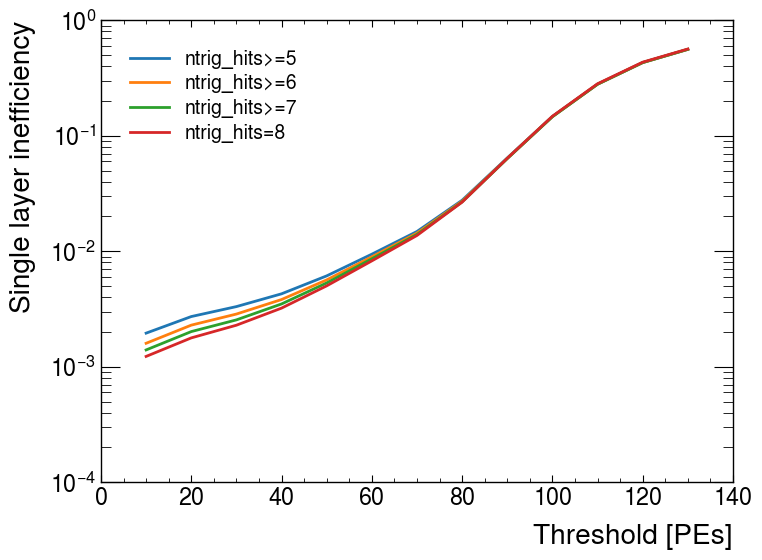

In [236]:
ineff_5_avg = []
ineff_6_avg = []
ineff_7_avg = []
ineff_8_avg = []
for i in range(len(ineff_5_0)):
    ineff_5_avg.append((ineff_5_0[i] + ineff_5_1[i] + ineff_5_2[i] + ineff_5_3[i])/4)
for i in range(len(ineff_6_0)):
    ineff_6_avg.append((ineff_6_0[i] + ineff_6_1[i] + ineff_6_2[i] + ineff_6_3[i])/4)
for i in range(len(ineff_7_0)):
    ineff_7_avg.append((ineff_7_0[i] + ineff_7_1[i] + ineff_7_2[i] + ineff_7_3[i])/4)
for i in range(len(ineff_8_0)):
    ineff_8_avg.append((ineff_8_0[i] + ineff_8_1[i] + ineff_8_2[i] + ineff_8_3[i])/4)

fig, ax = plt.subplots()

ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_avg, label='ntrig_hits>=5')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_avg, label='ntrig_hits>=6')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_avg, label='ntrig_hits>=7')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_avg, label='ntrig_hits=8')

ax.legend()

#ax.set_ylim(0.1, 1)

ax.set_yscale('log')

ax.set_xlabel('Threshold [PEs]')
ax.set_ylabel('Single layer inefficiency')

plt.show()

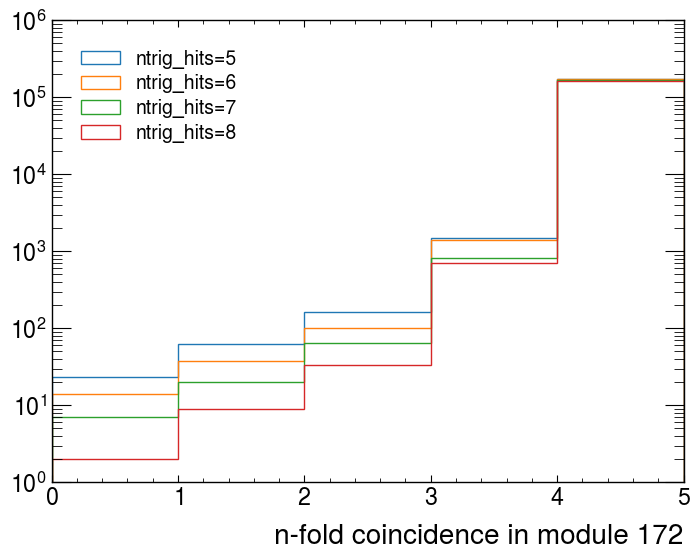

In [185]:
plt.hist(coincidence_5, bins=[0,1,2,3,4,5], histtype='step', label='ntrig_hits=5')
plt.hist(coincidence_6, bins=[0,1,2,3,4,5], histtype='step', label='ntrig_hits=6')
plt.hist(coincidence_7, bins=[0,1,2,3,4,5], histtype='step', label='ntrig_hits=7')
plt.hist(coincidence_8, bins=[0,1,2,3,4,5], histtype='step', label='ntrig_hits=8')

plt.legend(loc='upper left')
plt.yscale('log')
plt.xlabel('n-fold coincidence in module 172')
plt.show()

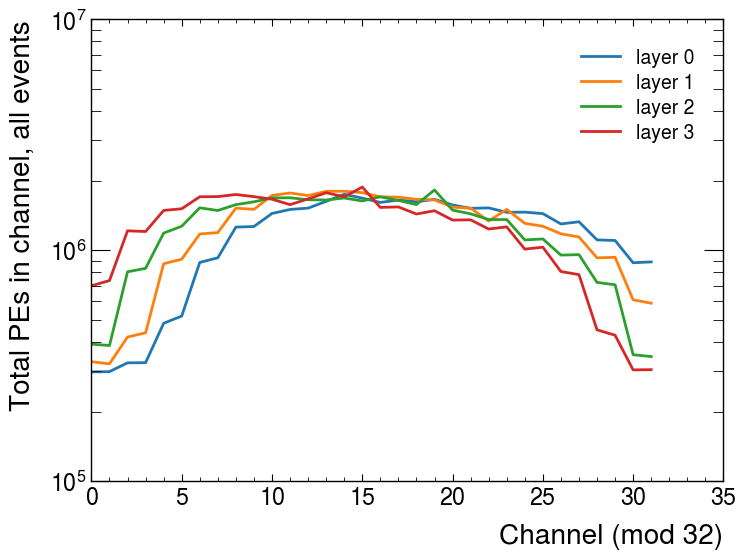

In [87]:
fig, ax = plt.subplots()

ax.plot(np.linspace(0, 31, 32, endpoint=True), chans_0, label='layer 0')
ax.plot(np.linspace(0, 31, 32, endpoint=True), chans_1, label='layer 1')
ax.plot(np.linspace(0, 31, 32, endpoint=True), chans_2, label='layer 2')
ax.plot(np.linspace(0, 31, 32, endpoint=True), chans_3, label='layer 3')

ax.legend()

ax.set_yscale('log')

ax.set_xlabel('Channel (mod 32)')
ax.set_ylabel('Total PEs in channel, all events')

plt.show()

In [88]:
print(ak.sum(chans_0))
print(ak.sum(chans_1))
print(ak.sum(chans_2))
print(ak.sum(chans_3))

38188711.90625
39803756.15625
39691652.0
40244309.28125


In [172]:
FEB0_0 = (ak.sum(ar['PEs'][:,0,2:30], axis=-1)>10)
FEB0_1 = (ak.sum(ar['PEs'][:,0,34:62], axis=-1)>10)

FEB1_0 = (ak.sum(ar['PEs'][:,1,2:30], axis=-1)>10)
FEB1_1 = (ak.sum(ar['PEs'][:,1,34:62], axis=-1)>10)

FEB2_0 = (ak.sum(ar['PEs'][:,2,2:30], axis=-1)>10)
FEB2_1 = (ak.sum(ar['PEs'][:,2,34:62], axis=-1)>10)

FEB5_0 = (ak.sum(ar['PEs'][:,5,2:30], axis=-1)>10)
FEB5_1 = (ak.sum(ar['PEs'][:,5,34:62], axis=-1)>10)

nHits = ak.values_astype(FEB0_0, "int") + ak.values_astype(FEB0_1, "int") + \
        ak.values_astype(FEB1_0, "int") + ak.values_astype(FEB1_1, "int") + \
        ak.values_astype(FEB2_0, "int") + ak.values_astype(FEB2_1, "int") + \
        ak.values_astype(FEB5_0, "int") + ak.values_astype(FEB5_1, "int")


arr_clean = ar[nHits == 8]

FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>10)
FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>10)

FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>10)
FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>10)

nHits_test = ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
             ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int")

arr_clean[(nHits_test <= 1)]

<Array [{spillNumber: 64, ...}, ..., {...}] type='11 * {spillNumber: int32,...'>

In [169]:
arr_clean[(nHits_test==0)]

<Array [{spillNumber: 1, ...}, ..., {...}] type='23612 * {spillNumber: int3...'>

Yuri's method below:

In [96]:
feb_masks = []
#Fill the list of bool arrays for triggered modules
for feb in [0,1,2,5]:
    print("Processing FEB %d"%feb)
    feb_mask = ak.sum(ar['PEs'][:, feb, 8:24], axis=-1) > 10
    feb_masks.append(feb_mask)
    feb_mask = ak.sum(ar['PEs'][:, feb, 40:56], axis=-1) > 10
    feb_masks.append(feb_mask)
feb_trig_masks = list(feb_masks[i] for i in range(len(feb_masks))) # Trig layers starting from the top

nTrigHits = sum(ak.values_astype(mask, "int") for mask in feb_trig_masks)

#Get cleaned up array with hits in the triggered layers 
ar_trig = ar[nTrigHits>=7]

Processing FEB 0
Processing FEB 1
Processing FEB 2
Processing FEB 5


In [97]:
def getNHits(threshold = 10):
    feb_masks = []
    #Fill the list of bool arrays for test modules
    for feb in [3,4]:
        feb_mask = ak.sum(ar_trig['PEs'][:, feb, 0:32], axis=-1) > threshold
        feb_masks.append(feb_mask)
        feb_mask = ak.sum(ar_trig['PEs'][:, feb, 32:64], axis=-1) > threshold
        feb_masks.append(feb_mask)
    feb_test_masks = list(feb_masks[i] for i in range(len(feb_masks)))
    return feb_test_masks

In [98]:
feb_test_masks = []
nTestHits = []
thresholds = range(10, 150, 10)

for index, threshold in enumerate(thresholds):
    completion_percentage = (index+1) / len(thresholds) * 100
    print(f"{completion_percentage:.2f}% complete       \r", end="")
    feb_test_masks_ = getNHits(threshold)
    feb_test_masks.append(feb_test_masks_)
    nTestHits_ = sum(ak.values_astype(mask, "int") for mask in feb_test_masks_)
    nTestHits.append(nTestHits_)

In [104]:
df = pd.DataFrame(columns=['layer', 'threshold', 'inefficiency'])
for index, threshold in enumerate(thresholds):
    for layer in range(0,4):
        nSingleHits = ak.sum(feb_test_masks[index][layer])
        inefficiency = 1-nSingleHits/ak.count(ar_trig['eventNumber'])        
        new_row = {'layer': layer, 'threshold':threshold, 'inefficiency':inefficiency}
        df.loc[len(df)] = new_row

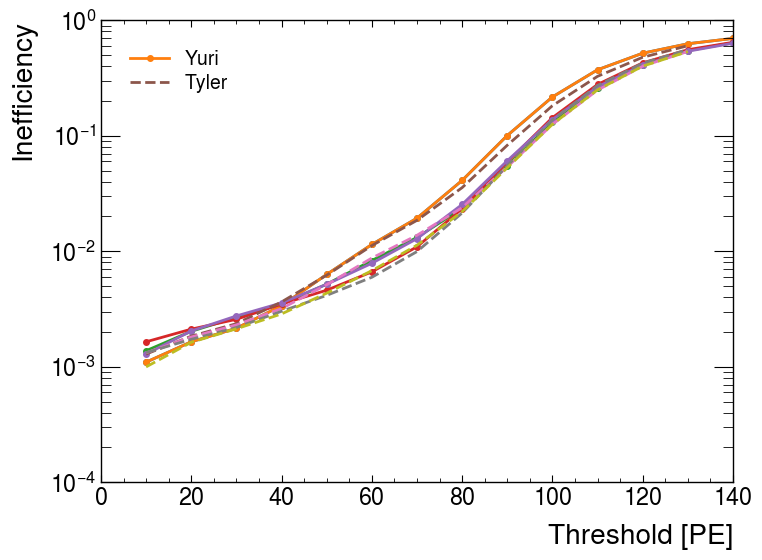

In [111]:
for layer in range(0,4):
    x=df.query('layer==%d'%layer)['threshold']
    y=df.query('layer==%d'%layer)['inefficiency']
    plt.plot(x, y, '.-');
    if layer == 0:
        plt.plot(x, y, '.-', label='Yuri')
    plt.yscale('log')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_0, '--', label='Tyler')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_1, '--')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_2, '--')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_3, '--')

plt.legend()

plt.ylabel('Inefficiency')
plt.xlabel('Threshold [PE]');

In [237]:
ineff_8_2fold = []
ineff_8_3fold = []
ineff_8_4fold = []
ineff_8_0 = []
ineff_8_1 = []
ineff_8_2 = []
ineff_8_3 = []

ineff_7_2fold = []
ineff_7_3fold = []
ineff_7_4fold = []
ineff_7_0 = []
ineff_7_1 = []
ineff_7_2 = []
ineff_7_3 = []

FEB0_0 = (ak.sum(ar['PEs'][:,0,4:28], axis=-1)>10)
FEB0_1 = (ak.sum(ar['PEs'][:,0,36:60], axis=-1)>10)

FEB1_0 = (ak.sum(ar['PEs'][:,1,4:28], axis=-1)>10)
FEB1_1 = (ak.sum(ar['PEs'][:,1,36:60], axis=-1)>10)

FEB2_0 = (ak.sum(ar['PEs'][:,2,4:28], axis=-1)>10)
FEB2_1 = (ak.sum(ar['PEs'][:,2,36:60], axis=-1)>10)

FEB5_0 = (ak.sum(ar['PEs'][:,5,4:28], axis=-1)>10)
FEB5_1 = (ak.sum(ar['PEs'][:,5,36:60], axis=-1)>10)

nHits = ak.values_astype(FEB0_0, "int") + ak.values_astype(FEB0_1, "int") + \
        ak.values_astype(FEB1_0, "int") + ak.values_astype(FEB1_1, "int") + \
        ak.values_astype(FEB2_0, "int") + ak.values_astype(FEB2_1, "int") + \
        ak.values_astype(FEB5_0, "int") + ak.values_astype(FEB5_1, "int")

arr_clean = ar[nHits >= 8]

for thresh in range(10,140,10):
    
    FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>thresh)
    FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>thresh)

    FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>thresh)
    FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>thresh)

    nHits_test = ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
                 ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int")


    nPass_2fold = ak.count(arr_clean[nHits_test >= 2]['eventNumber'])
    nPass_3fold = ak.count(arr_clean[nHits_test >= 3]['eventNumber'])
    nPass_4fold = ak.count(arr_clean[nHits_test >= 4]['eventNumber'])

    nPass_0 = ak.count(arr_clean[FEB3_0]['eventNumber'])
    nPass_1 = ak.count(arr_clean[FEB3_1]['eventNumber'])
    nPass_2 = ak.count(arr_clean[FEB4_0]['eventNumber'])
    nPass_3 = ak.count(arr_clean[FEB4_1]['eventNumber'])

    nTrig = ak.count(arr_clean['eventNumber'])

    ineff_8_2fold.append(1 - nPass_2fold/nTrig)
    ineff_8_3fold.append(1 - nPass_3fold/nTrig)
    ineff_8_4fold.append(1 - nPass_4fold/nTrig)
    ineff_8_0.append(1 - nPass_0/nTrig)
    ineff_8_1.append(1 - nPass_1/nTrig)
    ineff_8_2.append(1 - nPass_2/nTrig)
    ineff_8_3.append(1 - nPass_3/nTrig)
    
    print("{0} % finished".format(round(100*thresh/130, 0)))
    
arr_clean = ar[FEB0_0 & FEB5_1 & (nHits >= 7)]
    
for thresh in range(10,140,10):
    
    FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>thresh)
    FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>thresh)

    FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>thresh)
    FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>thresh)

    nHits_test = ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
                 ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int")


    nPass_2fold = ak.count(arr_clean[nHits_test >= 2]['eventNumber'])
    nPass_3fold = ak.count(arr_clean[nHits_test >= 3]['eventNumber'])
    nPass_4fold = ak.count(arr_clean[nHits_test >= 4]['eventNumber'])

    nPass_0 = ak.count(arr_clean[FEB3_0]['eventNumber'])
    nPass_1 = ak.count(arr_clean[FEB3_1]['eventNumber'])
    nPass_2 = ak.count(arr_clean[FEB4_0]['eventNumber'])
    nPass_3 = ak.count(arr_clean[FEB4_1]['eventNumber'])

    nTrig = ak.count(arr_clean['eventNumber'])
    
    print(nTrig)

    ineff_7_2fold.append(1 - nPass_2fold/nTrig)
    ineff_7_3fold.append(1 - nPass_3fold/nTrig)
    ineff_7_4fold.append(1 - nPass_4fold/nTrig)
    ineff_7_0.append(1 - nPass_0/nTrig)
    ineff_7_1.append(1 - nPass_1/nTrig)
    ineff_7_2.append(1 - nPass_2/nTrig)
    ineff_7_3.append(1 - nPass_3/nTrig)
    
    print("{0} % finished".format(round(100*thresh/130, 0)))


8.0 % finished
15.0 % finished
23.0 % finished
31.0 % finished
38.0 % finished
46.0 % finished
54.0 % finished
62.0 % finished
69.0 % finished
77.0 % finished
85.0 % finished
92.0 % finished
100.0 % finished
133321
8.0 % finished
133321
15.0 % finished
133321
23.0 % finished
133321
31.0 % finished
133321
38.0 % finished
133321
46.0 % finished
133321
54.0 % finished
133321
62.0 % finished
133321
69.0 % finished
133321
77.0 % finished
133321
85.0 % finished
133321
92.0 % finished
133321
100.0 % finished


In [238]:
ineff_8_2_comb = []
ineff_8_3_comb = []
ineff_8_4_comb = []

ineff_7_2_comb = []
ineff_7_3_comb = []
ineff_7_4_comb = []

for i in range(len(ineff_8_0)):
    pass_0 = 1 - ineff_8_0[i]
    pass_1 = 1 - ineff_8_1[i]
    pass_2 = 1 - ineff_8_2[i]
    pass_3 = 1 - ineff_8_3[i]
    
    pass_avg = (pass_0 + pass_1 + pass_2 + pass_3)/4
    
    fail_0 = ineff_8_0[i]
    fail_1 = ineff_8_1[i]
    fail_2 = ineff_8_2[i]
    fail_3 = ineff_8_3[i]
    
    passes_2 = pass_0*pass_1*pass_2*fail_3 + \
             pass_0*pass_1*fail_2*pass_3 + \
             pass_0*fail_1*pass_2*pass_3 + \
             fail_0*pass_1*pass_2*pass_3 + \
             pass_0*pass_1*pass_2*pass_3 + \
             pass_0*pass_1*fail_2*fail_3 + \
             pass_0*fail_1*pass_2*fail_3 + \
             pass_0*fail_1*fail_2*pass_3 + \
             fail_0*pass_1*pass_2*fail_3 + \
             fail_0*pass_1*fail_2*pass_3 + \
             fail_0*fail_1*pass_2*pass_3
    
    passes_3 = pass_0*pass_1*pass_2*fail_3 + \
             pass_0*pass_1*fail_2*pass_3 + \
             pass_0*fail_1*pass_2*pass_3 + \
             fail_0*pass_1*pass_2*pass_3 + \
             pass_0*pass_1*pass_2*pass_3
    
    passes_4 = pass_0*pass_1*pass_2*pass_3
    
    ineff_8_2_comb.append(1 - passes_2)
    ineff_8_3_comb.append(1 - passes_3)
    ineff_8_4_comb.append(1 - passes_4)
    
for i in range(len(ineff_7_0)):
    pass_0 = 1 - ineff_7_0[i]
    pass_1 = 1 - ineff_7_1[i]
    pass_2 = 1 - ineff_7_2[i]
    pass_3 = 1 - ineff_7_3[i]
    
    pass_avg = (pass_0 + pass_1 + pass_2 + pass_3)/4
    
    fail_0 = ineff_7_0[i]
    fail_1 = ineff_7_1[i]
    fail_2 = ineff_7_2[i]
    fail_3 = ineff_7_3[i]
    
    passes_2 = pass_0*pass_1*pass_2*fail_3 + \
             pass_0*pass_1*fail_2*pass_3 + \
             pass_0*fail_1*pass_2*pass_3 + \
             fail_0*pass_1*pass_2*pass_3 + \
             pass_0*pass_1*pass_2*pass_3 + \
             pass_0*pass_1*fail_2*fail_3 + \
             pass_0*fail_1*pass_2*fail_3 + \
             pass_0*fail_1*fail_2*pass_3 + \
             fail_0*pass_1*pass_2*fail_3 + \
             fail_0*pass_1*fail_2*pass_3 + \
             fail_0*fail_1*pass_2*pass_3
    
    passes_3 = pass_0*pass_1*pass_2*fail_3 + \
             pass_0*pass_1*fail_2*pass_3 + \
             pass_0*fail_1*pass_2*pass_3 + \
             fail_0*pass_1*pass_2*pass_3 + \
             pass_0*pass_1*pass_2*pass_3
    
    passes_4 = pass_0*pass_1*pass_2*pass_3
    
    ineff_7_2_comb.append(1 - passes_2)
    ineff_7_3_comb.append(1 - passes_3)
    ineff_7_4_comb.append(1 - passes_4)
    

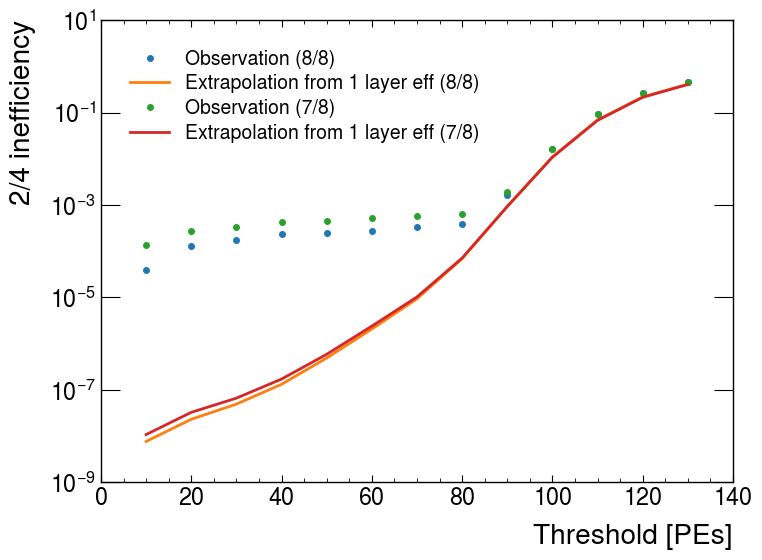

In [239]:
fig, ax = plt.subplots()

ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_2fold, '.', label='Observation (8/8)')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_2_comb, '-', label='Extrapolation from 1 layer eff (8/8)')

ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_2fold, '.', label='Observation (7/8)')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_2_comb, '-', label='Extrapolation from 1 layer eff (7/8)')

ax.legend()

#ax.set_ylim(0.1, 1)

ax.set_yscale('log')

ax.set_xlabel('Threshold [PEs]')
ax.set_ylabel('2/4 inefficiency')

plt.show()

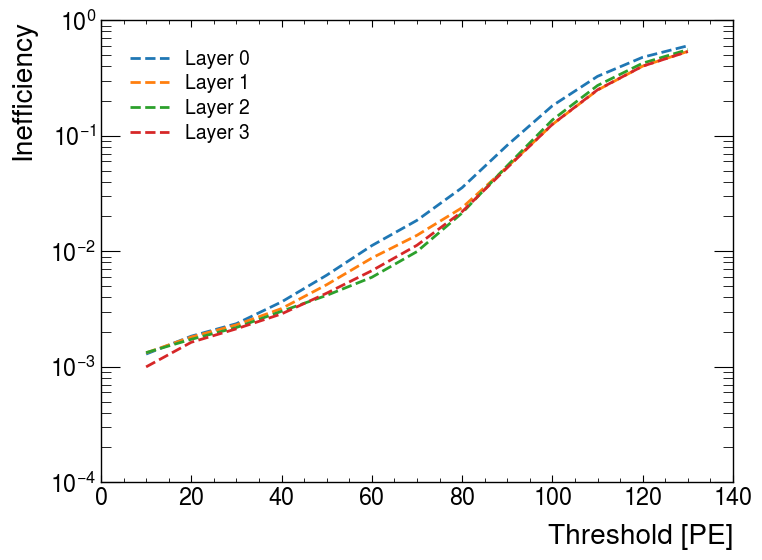

In [134]:
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_0, '--', label='Layer 0')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_1, '--', label='Layer 1')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_2, '--', label='Layer 2')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_3, '--', label='Layer 3')

plt.legend()
plt.yscale('log')

plt.ylabel('Inefficiency')
plt.xlabel('Threshold [PE]');

In [209]:
ineff_1 = []
ineff_2 = []

FEB3_0 = (ak.sum(ar['PEs'][:,3,2:30], axis=-1)>10)
FEB4_1 = (ak.sum(ar['PEs'][:,4,34:62], axis=-1)>10)


arr_clean = ar[FEB3_0 & FEB4_1]

for thresh in range(10,140,10):
    
    FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>thresh)

    FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>thresh)

    nPass_1 = ak.count(arr_clean[FEB3_1]['eventNumber'])
    nPass_2 = ak.count(arr_clean[FEB4_0]['eventNumber'])

    nTrig = ak.count(arr_clean['eventNumber'])

    ineff_1.append(1 - nPass_1/nTrig)
    ineff_2.append(1 - nPass_2/nTrig)

    print(thresh)


10
20
30
40
50
60
70
80
90
100
110
120
130


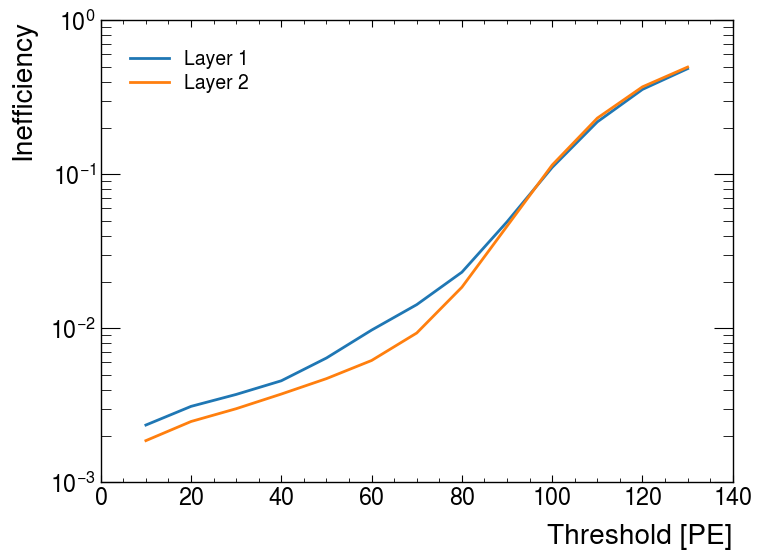

In [212]:
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_1, '-', label='Layer 1')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_2, '-', label='Layer 2')

plt.legend()
plt.yscale('log')

plt.ylabel('Inefficiency')
plt.xlabel('Threshold [PE]')
plt.show()

In [213]:
ineff_2_comb = []
ineff_3_comb = []
ineff_4_comb = []

for i in range(len(ineff_1)):
    pass_1 = 1 - ineff_1[i]
    pass_2 = 1 - ineff_2[i]
    
    pass_avg = (pass_1 + pass_2)/2
    
    
    passes_2 = 6*pass_avg**2 - 8*pass_avg**3 + 3*pass_avg**4
    
    passes_3 = 4*pass_avg**3 - 3*pass_avg**4
    
    passes_4 = pass_avg**4
    
    ineff_2_comb.append(1 - passes_2)
    ineff_3_comb.append(1 - passes_3)
    ineff_4_comb.append(1 - passes_4)
    

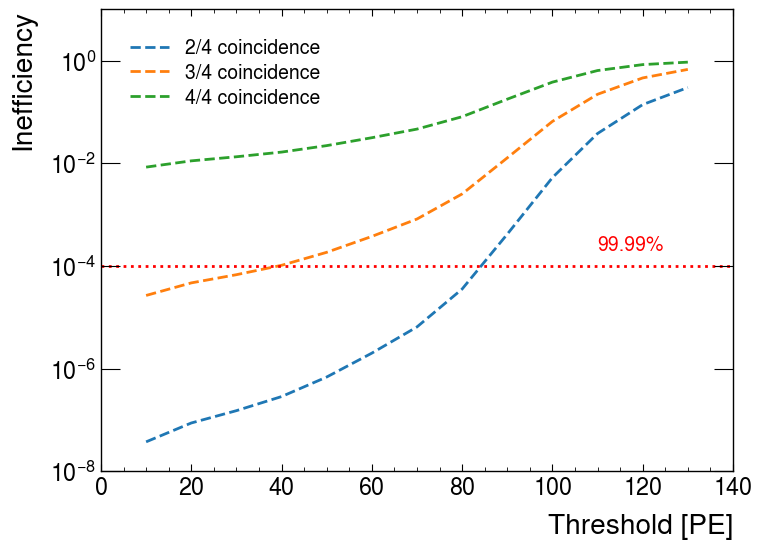

In [219]:
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_2_comb, '--', label='2/4 coincidence')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_3_comb, '--', label='3/4 coincidence')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_4_comb, '--', label='4/4 coincidence')
plt.axhline(y=0.0001, c='r', linestyle='dotted')
plt.text(110, 0.0002, '99.99%', c='r') 

plt.legend()
plt.yscale('log')

#plt.title('Expected inefficiency from extrapolated single layer efficiency')
plt.ylabel('Inefficiency')
plt.xlabel('Threshold [PE]')
plt.show()

In [223]:
ineff_8_3_comb = []

for i in range(len(ineff_8_0)):
    pass_0 = 1 - ineff_8_0[i]
    pass_1 = 1 - ineff_8_1[i]
    pass_2 = 1 - ineff_8_2[i]
    pass_3 = 1 - ineff_8_3[i]
    
    pass_avg = (pass_0 + pass_1 + pass_2 + pass_3)/4
    
    fail_0 = ineff_8_0[i]
    fail_1 = ineff_8_1[i]
    fail_2 = ineff_8_2[i]
    fail_3 = ineff_8_3[i]
    
    passes_3 = pass_0*pass_1*pass_2*fail_3 + \
             pass_0*pass_1*fail_2*pass_3 + \
             pass_0*fail_1*pass_2*pass_3 + \
             fail_0*pass_1*pass_2*pass_3 + \
             pass_0*pass_1*pass_2*pass_3

    ineff_8_3_comb.append(1 - passes_3)
    

ineff_3_comb = []

for i in range(len(ineff_1)):
    pass_1 = 1 - ineff_1[i]
    pass_2 = 1 - ineff_2[i]
    
    pass_avg = (pass_1 + pass_2)/2
    
    passes_3 = 4*pass_avg**3 - 3*pass_avg**4

    ineff_3_comb.append(1 - passes_3)

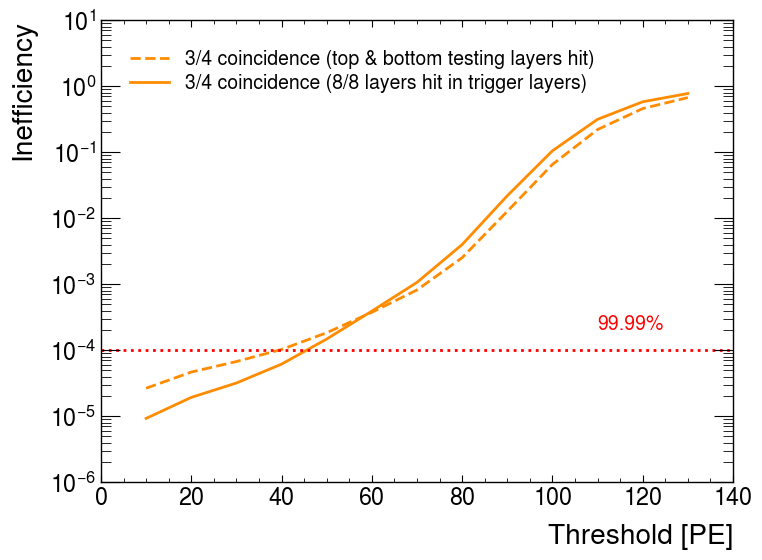

In [240]:
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_3_comb, '--', c='darkorange', label='3/4 coincidence (top & bottom testing layers hit)')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_3_comb, '-', c='darkorange', label='3/4 coincidence (8/8 layers hit in trigger layers)')
plt.axhline(y=0.0001, c='r', linestyle='dotted')
plt.text(110, 0.0002, '99.99%', c='r') 

plt.legend()
plt.yscale('log')

#plt.title('Expected inefficiency from extrapolated single layer efficiency')
plt.ylabel('Inefficiency')
plt.xlabel('Threshold [PE]')
plt.show()

In [241]:
ineff_l1_mod1 = []
ineff_l2_mod1 = []

FEB1_0 = (ak.sum(ar['PEs'][:,1,2:30], axis=-1)>10)
FEB2_1 = (ak.sum(ar['PEs'][:,2,34:62], axis=-1)>10)


arr_clean = ar[FEB1_0 & FEB2_1]

for thresh in range(10,140,10):
    
    FEB1_1 = (ak.sum(arr_clean['PEs'][:,1,32:64], axis=-1)>thresh)

    FEB2_0 = (ak.sum(arr_clean['PEs'][:,2,0:32], axis=-1)>thresh)

    nPass_1 = ak.count(arr_clean[FEB1_1]['eventNumber'])
    nPass_2 = ak.count(arr_clean[FEB2_0]['eventNumber'])

    nTrig = ak.count(arr_clean['eventNumber'])

    ineff_l1_mod1.append(1 - nPass_1/nTrig)
    ineff_l2_mod1.append(1 - nPass_2/nTrig)

    print(thresh)

    
ineff_l1_mod2 = []
ineff_l2_mod2 = []

FEB3_0 = (ak.sum(ar['PEs'][:,3,2:30], axis=-1)>10)
FEB4_1 = (ak.sum(ar['PEs'][:,4,34:62], axis=-1)>10)


arr_clean = ar[FEB3_0 & FEB4_1]

for thresh in range(10,140,10):
    
    FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>thresh)

    FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>thresh)

    nPass_1 = ak.count(arr_clean[FEB3_1]['eventNumber'])
    nPass_2 = ak.count(arr_clean[FEB4_0]['eventNumber'])

    nTrig = ak.count(arr_clean['eventNumber'])

    ineff_l1_mod2.append(1 - nPass_1/nTrig)
    ineff_l2_mod2.append(1 - nPass_2/nTrig)

    print(thresh)

10
20
30
40
50
60
70
80
90
100
110
120
130
10
20
30
40
50
60
70
80
90
100
110
120
130


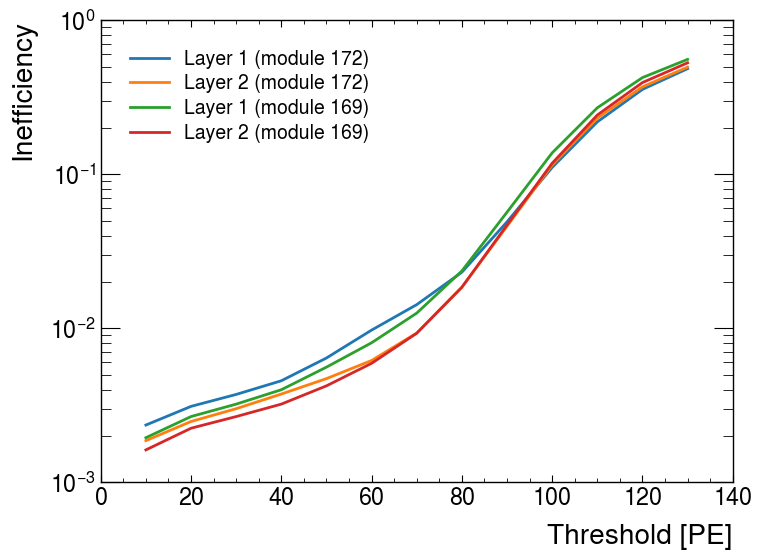

In [244]:
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_l1_mod2, '-', label='Layer 1 (module 172)')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_l2_mod2, '-', label='Layer 2 (module 172)')

plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_l1_mod1, '-', label='Layer 1 (module 169)')
plt.plot(np.linspace(10, 130, 13, endpoint=True), ineff_l2_mod1, '-', label='Layer 2 (module 169)')

plt.legend()
plt.yscale('log')

plt.ylabel('Inefficiency')
plt.xlabel('Threshold [PE]')
plt.show()